In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
pd.options.display.float_format = "{:20.5f}".format

In [4]:
pd.set_option("display.max_columns", 999)

In [5]:
df = pd.read_excel(r"E:\Academics\Projects\Machine Learning Projects\Kmeans Hands On\online_retail_II.xlsx", sheet_name=0)

In [6]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085.00000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10000,13085.00000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65000,13085.00000,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95000,13085.00000,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55000,13085.00000,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75000,13085.00000,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [8]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00000,525461,525461.00000,417534.00000
mean,10.33767,2010-06-28 11:37:36.845017856,4.68883,15360.64548
min,-9600.00000,2009-12-01 07:45:00,-53594.36000,12346.00000
25%,1.00000,2010-03-21 12:20:00,1.25000,13983.00000
50%,3.00000,2010-07-06 09:51:00,2.10000,15311.00000
75%,10.00000,2010-10-15 12:45:00,4.21000,16799.00000
max,19152.00000,2010-12-09 20:01:00,25111.09000,18287.00000
std,107.42411,NaN,146.12691,1680.81132


In [9]:
df.describe(include="O")

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [10]:
df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00000,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00000,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00000,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00000,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55000,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85000,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95000,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25000,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95000,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65000,NaN,United Kingdom


In [11]:
df[df["Quantity"]<0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95000,16321.00000,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65000,16321.00000,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25000,16321.00000,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10000,16321.00000,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95000,16321.00000,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25000,16321.00000,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25000,16321.00000,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85000,16321.00000,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95000,16321.00000,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25000,17592.00000,United Kingdom


In [12]:
df["Invoice"] = df["Invoice"].astype(str)

In [13]:
df[df["Invoice"].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95000,16321.00000,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65000,16321.00000,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25000,16321.00000,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10000,16321.00000,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95000,16321.00000,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10000,12605.00000,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50000,15329.00000,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95000,15329.00000,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75000,15329.00000,United Kingdom


In [14]:
df["Invoice"].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [15]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36000,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79000,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87000,NaN,United Kingdom


In [16]:
df[df["Invoice"].str.startswith("C")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95000,16321.00000,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65000,16321.00000,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25000,16321.00000,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10000,16321.00000,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95000,16321.00000,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10000,12605.00000,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50000,15329.00000,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95000,15329.00000,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75000,15329.00000,United Kingdom


In [17]:
df["StockCode"] = df["StockCode"].astype(str)

In [18]:
df[df["StockCode"].str.match("^\\d{5}$")== False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95000,13078.00000,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65000,13078.00000,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25000,13078.00000,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75000,13969.00000,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75000,13969.00000,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95000,13969.00000,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95000,17530.00000,United Kingdom


In [19]:
df[(df["StockCode"].str.match("^\\d{5}$")== False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$")== False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [20]:
df[df["StockCode"].str.contains("^DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19000,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96000,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39000,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35000,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39000,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94000,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32000,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68000,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94000,NaN,United Kingdom


In [21]:
cleaned_df = df.copy()

In [22]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype(str)

In [23]:
mask = (cleaned_df["Invoice"].str.match("^\\d{6}$") == True)

In [24]:
cleaned_df = cleaned_df[mask]

In [25]:
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085.00000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10000,13085.00000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95000,17530.00000,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75000,17530.00000,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75000,17530.00000,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75000,17530.00000,United Kingdom


In [26]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype(str)

In [27]:
mask = ((cleaned_df["StockCode"].str.match("^\\d{5}$")==True)
        |(cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-z]+$")==True)
         |(cleaned_df["StockCode"].str.match("^PADS$")==True))

In [28]:
cleaned_df = cleaned_df[mask]

In [29]:
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085.00000,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10000,13085.00000,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95000,17530.00000,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75000,17530.00000,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75000,17530.00000,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75000,17530.00000,United Kingdom


In [30]:
cleaned_df = cleaned_df.dropna(subset=["Customer ID"])

In [31]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.00000,406337,406337.00000,406337.00000
mean,13.61910,2010-07-01 10:11:06.543288320,2.99146,15373.63299
min,1.00000,2009-12-01 07:45:00,0.00000,12346.00000
25%,2.00000,2010-03-26 14:01:00,1.25000,14004.00000
50%,5.00000,2010-07-09 15:48:00,1.95000,15326.00000
75%,12.00000,2010-10-14 17:09:00,3.75000,16814.00000
max,19152.00000,2010-12-09 20:01:00,295.00000,18287.00000
std,97.00066,NaN,4.28588,1677.36591


In [32]:
len(cleaned_df[cleaned_df["Price"] == 0.00])

28

In [33]:
cleaned_df = cleaned_df[cleaned_df["Price"]> 0.00]

In [34]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.00000,406309,406309.00000,406309.00000
mean,13.61792,2010-07-01 10:14:25.869572352,2.99167,15373.72227
min,1.00000,2009-12-01 07:45:00,0.00100,12346.00000
25%,2.00000,2010-03-26 14:01:00,1.25000,14006.00000
50%,5.00000,2010-07-09 15:48:00,1.95000,15326.00000
75%,12.00000,2010-10-14 17:09:00,3.75000,16814.00000
max,19152.00000,2010-12-09 20:01:00,295.00000,18287.00000
std,96.99883,NaN,4.28595,1677.32947


In [35]:
len(cleaned_df)/len(df)*100

77.32429238325965

In [36]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]

In [37]:
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95000,13085.00000,United Kingdom,83.40000
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom,81.00000
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75000,13085.00000,United Kingdom,81.00000
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10000,13085.00000,United Kingdom,100.80000
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25000,13085.00000,United Kingdom,30.00000
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95000,17530.00000,United Kingdom,5.90000
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75000,17530.00000,United Kingdom,3.75000
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75000,17530.00000,United Kingdom,3.75000
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75000,17530.00000,United Kingdom,7.50000


In [38]:
aggregated_df = cleaned_df.groupby(by="Customer ID", as_index=False).agg(
    MonetaryValue=("SalesLineTotal", "sum"),
    Frequency = ("Invoice", "nunique"),
    LastInvoiceDate= ("InvoiceDate", "max")
)

In [39]:
aggregated_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00000,169.36000,2,2010-06-28 13:53:00
1,12347.00000,1323.32000,2,2010-12-07 14:57:00
2,12348.00000,221.16000,1,2010-09-27 14:59:00
3,12349.00000,2221.14000,2,2010-10-28 08:23:00
4,12351.00000,300.93000,1,2010-11-29 15:23:00
...,...,...,...,...
4280,18283.00000,641.77000,6,2010-11-22 15:30:00
4281,18284.00000,411.68000,1,2010-10-04 11:33:00
4282,18285.00000,377.00000,1,2010-02-17 10:24:00
4283,18286.00000,1246.43000,2,2010-08-20 11:57:00


In [40]:
aggregated_df.head(10)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00000,169.36000,2,2010-06-28 13:53:00
1,12347.00000,1323.32000,2,2010-12-07 14:57:00
2,12348.00000,221.16000,1,2010-09-27 14:59:00
3,12349.00000,2221.14000,2,2010-10-28 08:23:00
4,12351.00000,300.93000,1,2010-11-29 15:23:00
5,12352.00000,343.80000,2,2010-11-29 10:07:00
6,12353.00000,317.76000,1,2010-10-27 12:44:00
7,12355.00000,488.21000,1,2010-05-21 11:59:00
8,12356.00000,3126.25000,3,2010-11-24 12:24:00
9,12357.00000,11229.99000,1,2010-11-16 10:05:00


In [41]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

In [42]:
max_invoice_date

Timestamp('2010-12-09 20:01:00')

In [43]:
aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

In [44]:
aggregated_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00000,169.36000,2,2010-06-28 13:53:00,164
1,12347.00000,1323.32000,2,2010-12-07 14:57:00,2
2,12348.00000,221.16000,1,2010-09-27 14:59:00,73
3,12349.00000,2221.14000,2,2010-10-28 08:23:00,42
4,12351.00000,300.93000,1,2010-11-29 15:23:00,10
...,...,...,...,...,...
4280,18283.00000,641.77000,6,2010-11-22 15:30:00,17
4281,18284.00000,411.68000,1,2010-10-04 11:33:00,66
4282,18285.00000,377.00000,1,2010-02-17 10:24:00,295
4283,18286.00000,1246.43000,2,2010-08-20 11:57:00,111


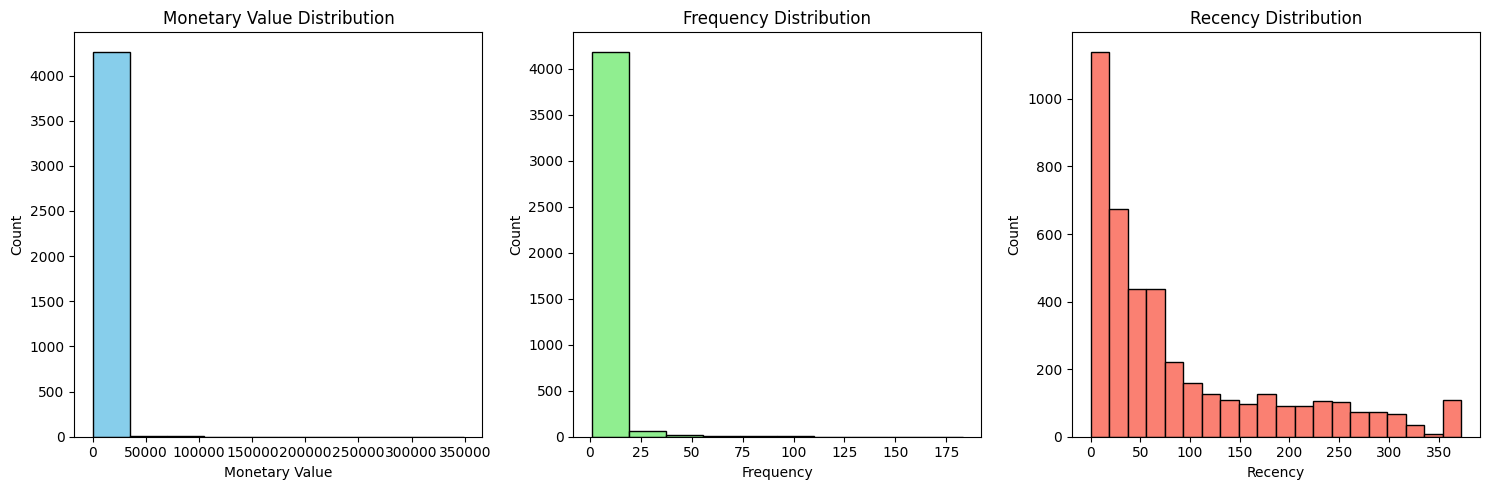

In [45]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

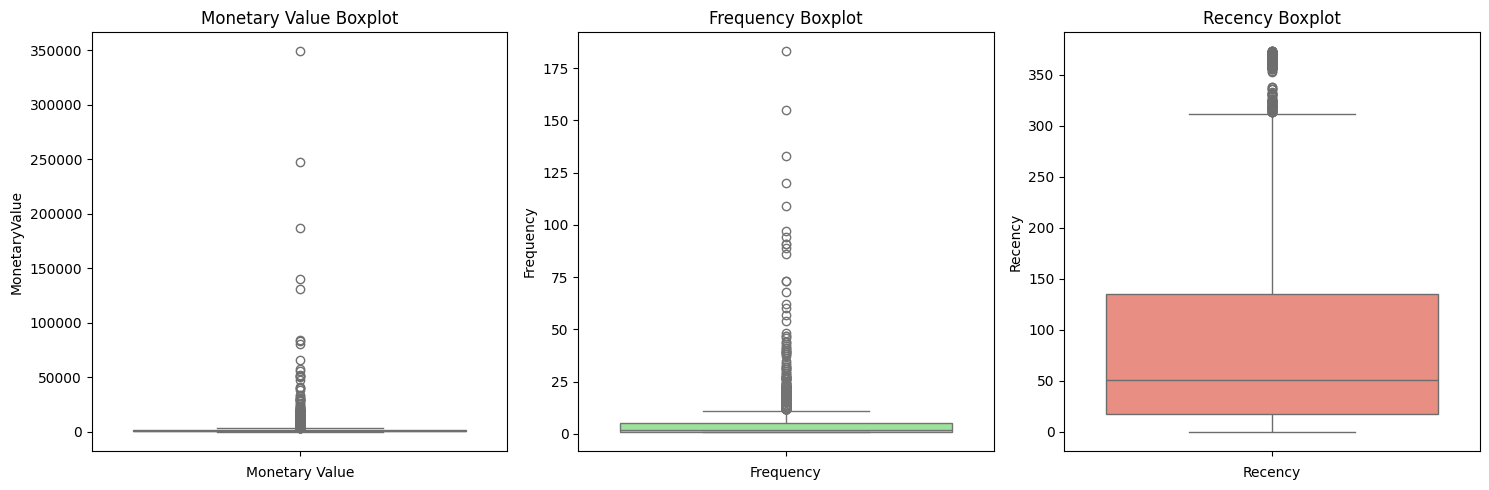

In [46]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=aggregated_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=aggregated_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

In [47]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)

In [48]:
M_IQR = M_Q3 - M_Q1

In [49]:
M_IQR

1396.73

In [50]:
monetary_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"]> (M_Q3 + 1.5 * M_IQR))| (aggregated_df["MonetaryValue"]< (M_Q1 - 1.5 * M_IQR))].copy()

In [51]:
monetary_outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
9,12357.00000,11229.99000,1,2010-11-16 10:05:00,23
25,12380.00000,4782.84000,4,2010-08-31 14:54:00,100
42,12409.00000,12346.62000,4,2010-10-15 10:24:00,55
48,12415.00000,19468.84000,4,2010-11-29 15:07:00,10
61,12431.00000,4145.52000,11,2010-12-01 10:03:00,8
...,...,...,...,...,...
4236,18225.00000,7545.14000,15,2010-12-09 15:46:00,0
4237,18226.00000,6650.83000,15,2010-11-26 15:51:00,13
4241,18231.00000,4791.80000,23,2010-10-29 14:17:00,41
4253,18251.00000,21964.14000,8,2010-09-20 13:26:00,80


In [52]:
monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.00000,423.00000,423.00000,423,423.00000
mean,15103.04019,12188.10174,17.16785,2010-11-09 12:26:02.978723328,30.03546
min,12357.00000,3802.04000,1.00000,2009-12-10 18:03:00,0.00000
25%,13622.00000,4605.94000,8.00000,2010-11-08 13:17:30,3.00000
50%,14961.00000,6191.32000,12.00000,2010-11-26 12:19:00,13.00000
75%,16692.00000,10273.23500,18.00000,2010-12-06 10:34:30,31.00000
max,18260.00000,349164.35000,183.00000,2010-12-09 19:32:00,364.00000
std,1728.66141,25830.85105,19.72975,NaN,51.54100


In [53]:
F_Q1 = aggregated_df["Frequency"].quantile(0.25)
F_Q3 = aggregated_df["Frequency"].quantile(0.75)
F_IQR = F_Q3 - F_Q1
frequency_outliers_df = aggregated_df[(aggregated_df["Frequency"]> (F_Q3 + 1.5 * F_IQR))|(aggregated_df["Frequency"]< (F_Q1 - 1.5 * F_IQR))].copy()

In [54]:
frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.00000,279.00000,279.00000,279,279.00000
mean,15352.65591,14409.71493,23.81004,2010-11-23 11:06:20.645161216,16.08961
min,12437.00000,1094.39000,12.00000,2010-05-12 16:51:00,0.00000
25%,13800.00000,4331.56050,13.00000,2010-11-20 13:14:30,2.00000
50%,15465.00000,6615.77000,17.00000,2010-12-02 10:46:00,7.00000
75%,16828.50000,11692.40500,23.00000,2010-12-07 11:08:30,19.00000
max,18260.00000,349164.35000,183.00000,2010-12-09 19:32:00,211.00000
std,1748.42999,31381.73679,21.93294,NaN,26.58912


In [55]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) &
                                (~aggregated_df.index.isin(frequency_outliers_df.index))] 

In [56]:
non_outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00000,169.36000,2,2010-06-28 13:53:00,164
1,12347.00000,1323.32000,2,2010-12-07 14:57:00,2
2,12348.00000,221.16000,1,2010-09-27 14:59:00,73
3,12349.00000,2221.14000,2,2010-10-28 08:23:00,42
4,12351.00000,300.93000,1,2010-11-29 15:23:00,10
...,...,...,...,...,...
4280,18283.00000,641.77000,6,2010-11-22 15:30:00,17
4281,18284.00000,411.68000,1,2010-10-04 11:33:00,66
4282,18285.00000,377.00000,1,2010-02-17 10:24:00,295
4283,18286.00000,1246.43000,2,2010-08-20 11:57:00,111


In [57]:
non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.00000,3809.00000,3809.00000,3809,3809.00000
mean,15376.48280,885.50220,2.86348,2010-09-03 11:16:46.516146176,97.08217
min,12346.00000,1.55000,1.00000,2009-12-01 10:49:00,0.00000
25%,13912.00000,279.91000,1.00000,2010-07-08 14:48:00,22.00000
50%,15389.00000,588.05000,2.00000,2010-10-12 16:25:00,58.00000
75%,16854.00000,1269.05000,4.00000,2010-11-17 13:14:00,154.00000
max,18287.00000,3788.21000,11.00000,2010-12-09 20:01:00,373.00000
std,1693.19981,817.67228,2.24375,NaN,98.11149


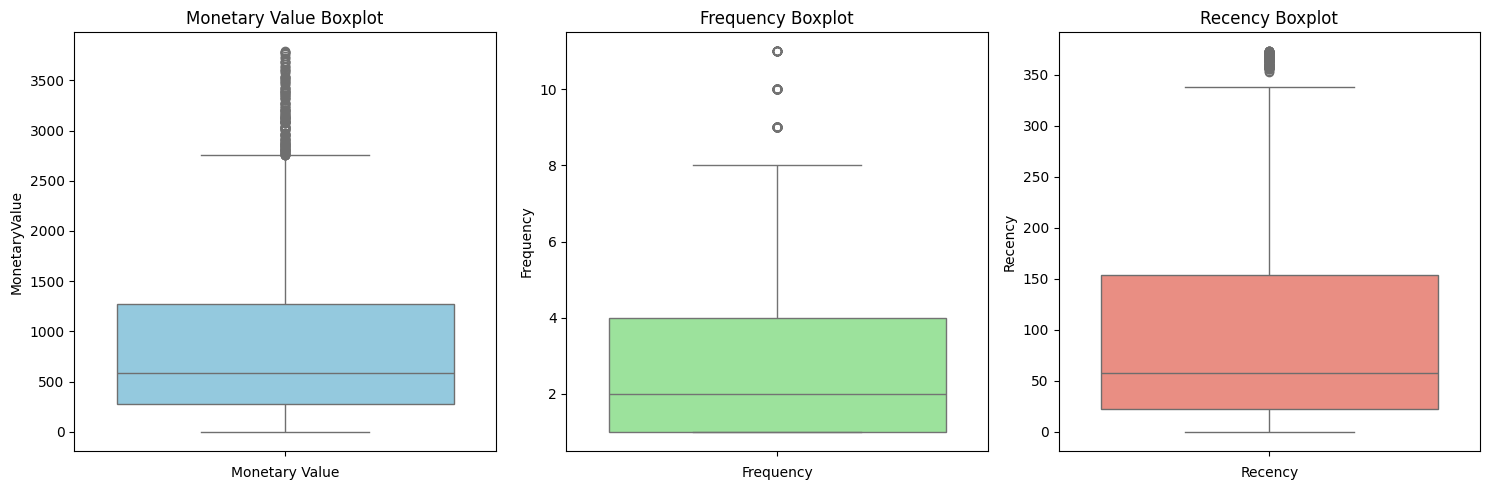

In [58]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

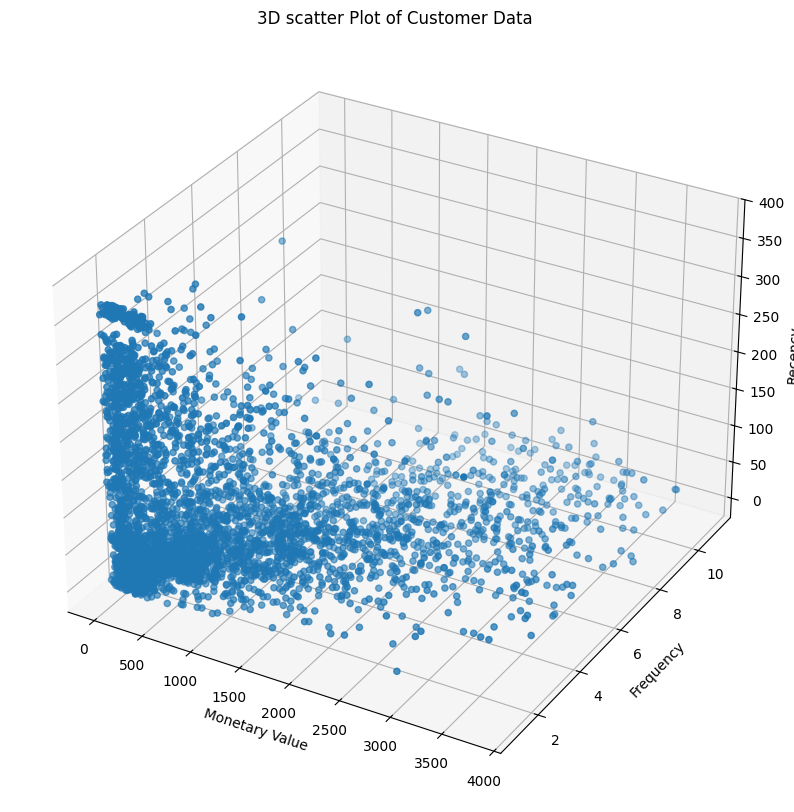

In [59]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection="3d")
scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])
ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D scatter Plot of Customer Data")

plt.show()

In [60]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])

In [61]:
scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [62]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=("MonetaryValue", "Frequency", "Recency"))

In [63]:
scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.87595,-0.38489,0.68215
1,0.53551,-0.38489,-0.96925
2,-0.81259,-0.83063,-0.24549
3,1.63368,-0.38489,-0.56150
4,-0.71502,-0.83063,-0.88770
...,...,...,...
4280,-0.29812,1.39808,-0.81634
4281,-0.57955,-0.83063,-0.31685
4282,-0.62197,-0.83063,2.01754
4283,0.44147,-0.38489,0.14188


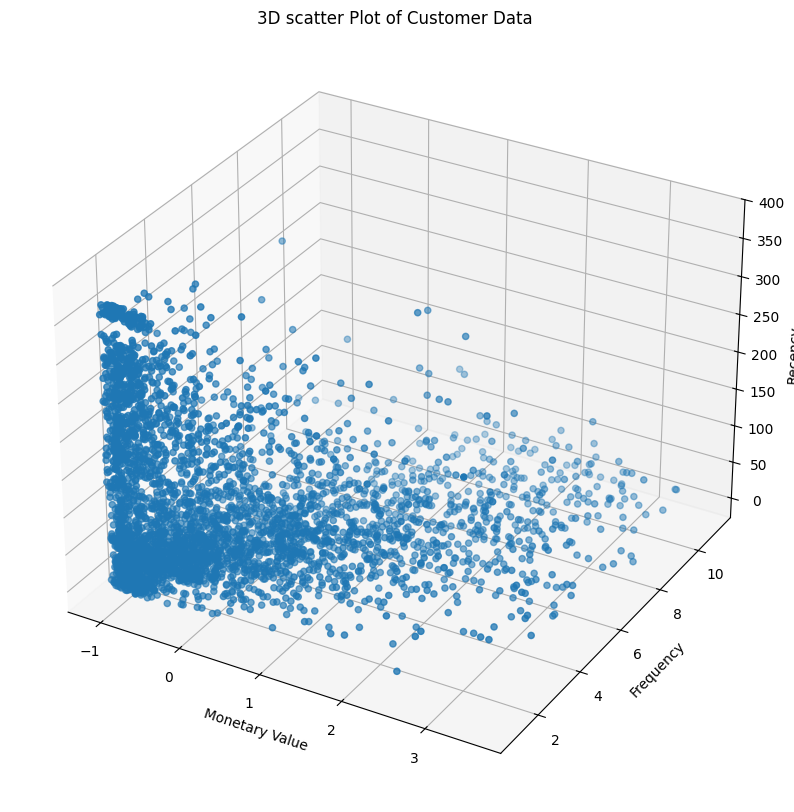

In [64]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection="3d")
scatter = ax.scatter(scaled_data_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])
ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D scatter Plot of Customer Data")

plt.show()

In [65]:
max_k = 12
inertia = []
silhouette_scores = []
k_values = range(2,max_k + 1)
for k in k_values:
    Kmeans = KMeans(n_clusters=k, random_state=42, init="k-means++", max_iter=1000)
    cluster_labels = Kmeans.fit_predict(scaled_data_df)
    sil_scores = silhouette_score(scaled_data_df, cluster_labels)
    silhouette_scores.append(sil_scores)
    inertia.append(Kmeans.inertia_)

inertia

[6174.788199288076,
 3606.6529145453515,
 2751.5524060674425,
 2380.777694064574,
 2211.118681648321,
 1894.263591830811,
 1694.6319989767553,
 1528.276475006398,
 1371.2892934849008,
 1278.6634842889753,
 1228.64707376126]

In [66]:
silhouette_scores

[0.44361739628420815,
 0.45859179211604556,
 0.4158069587875063,
 0.4027203429974246,
 0.3815222385050153,
 0.3584766280825417,
 0.298020232177602,
 0.30431752856723554,
 0.33142928256190735,
 0.3178394982517,
 0.30080914100608064]

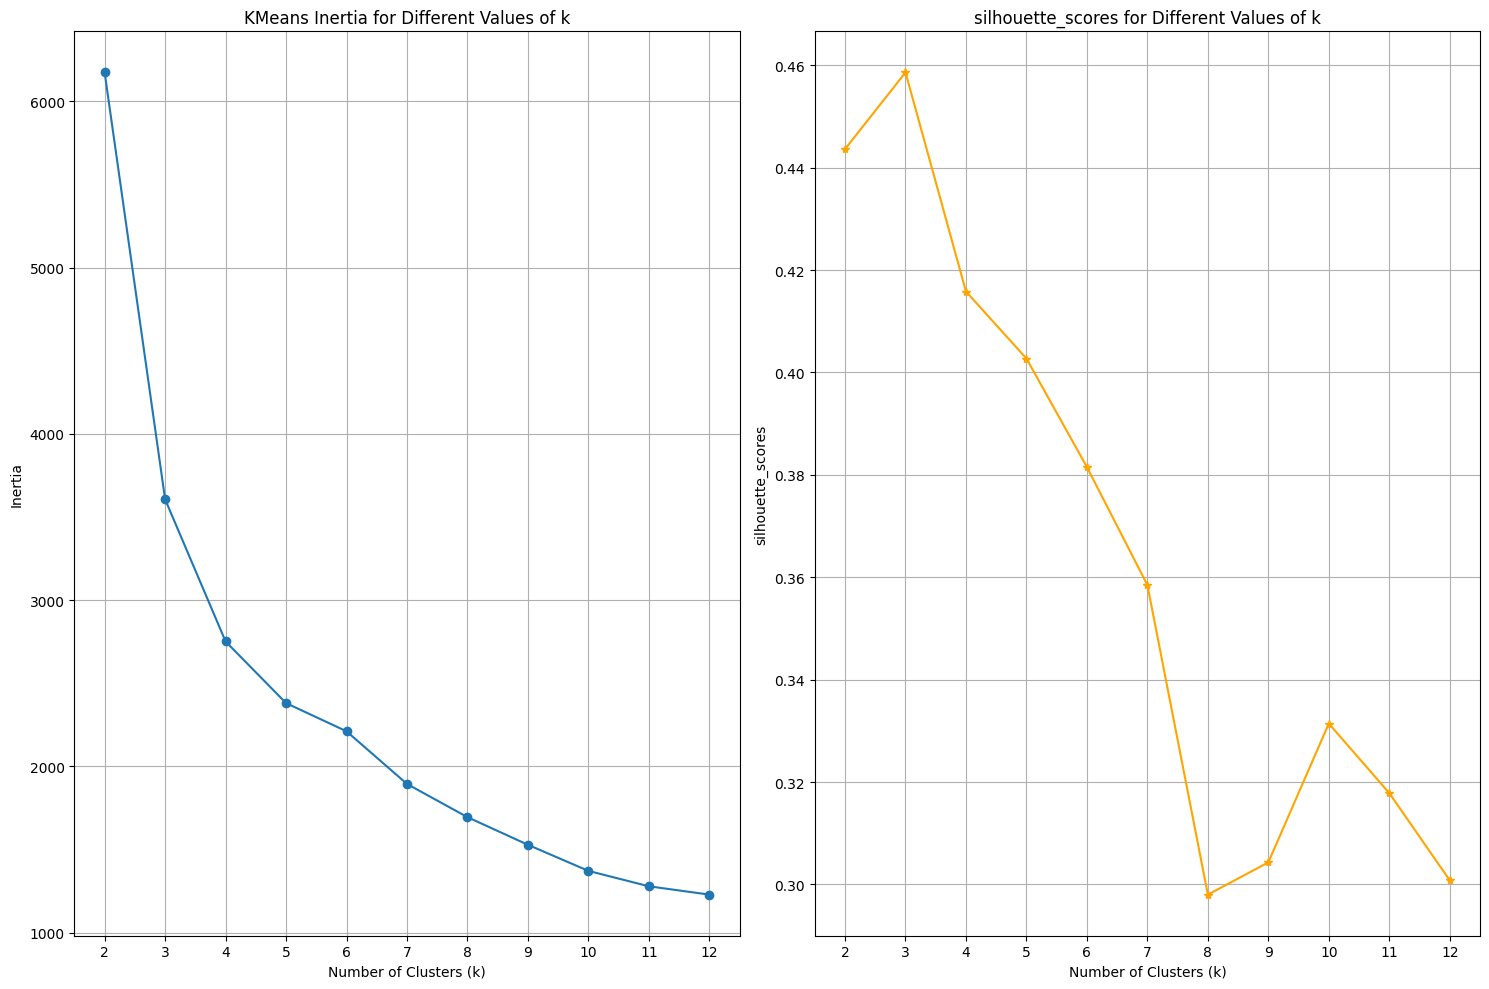

In [67]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)


plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, marker='*', color="orange")
plt.title('silhouette_scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('silhouette_scores')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()

In [68]:
kmeans = KMeans(n_clusters=4, random_state=42, init="k-means++", max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([1, 0, 2, ..., 1, 0, 0])

In [69]:
non_outliers_df["Cluster"] = cluster_labels

C:\Users\lucif\AppData\Local\Temp\ipykernel_17220\716382161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_labels


In [70]:
non_outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00000,169.36000,2,2010-06-28 13:53:00,164,1
1,12347.00000,1323.32000,2,2010-12-07 14:57:00,2,0
2,12348.00000,221.16000,1,2010-09-27 14:59:00,73,2
3,12349.00000,2221.14000,2,2010-10-28 08:23:00,42,0
4,12351.00000,300.93000,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.00000,641.77000,6,2010-11-22 15:30:00,17,0
4281,18284.00000,411.68000,1,2010-10-04 11:33:00,66,2
4282,18285.00000,377.00000,1,2010-02-17 10:24:00,295,1
4283,18286.00000,1246.43000,2,2010-08-20 11:57:00,111,0


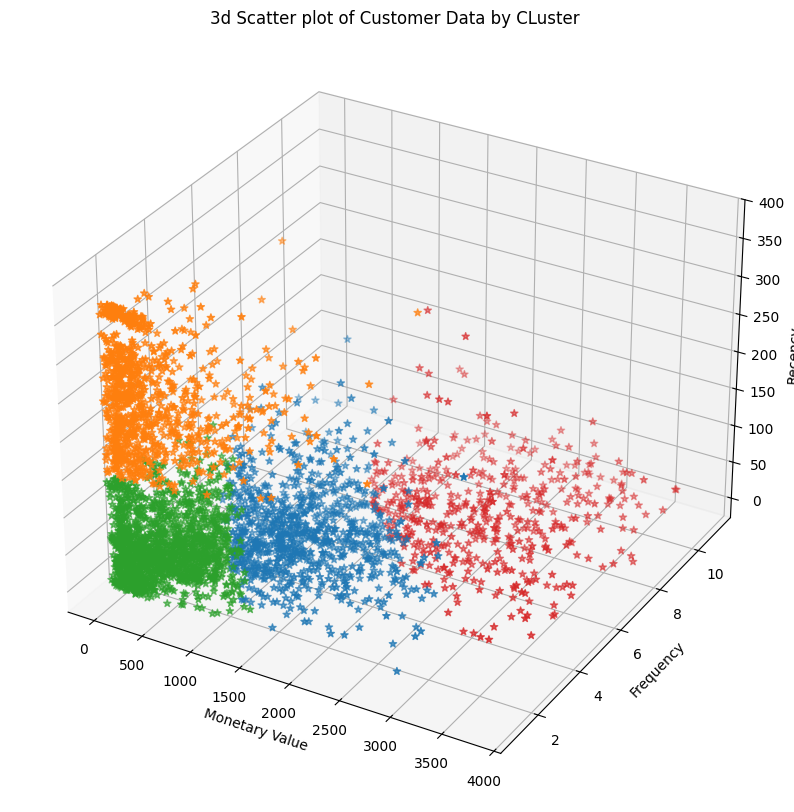

In [71]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outliers_df["Cluster"].map(cluster_colors)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(projection="3d")
scatter = ax.scatter(non_outliers_df["MonetaryValue"],
                     non_outliers_df["Frequency"],
                     non_outliers_df["Recency"],
                     c=colors,
                     s=30,
                     marker="*")

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3d Scatter plot of Customer Data by CLuster")
plt.show()

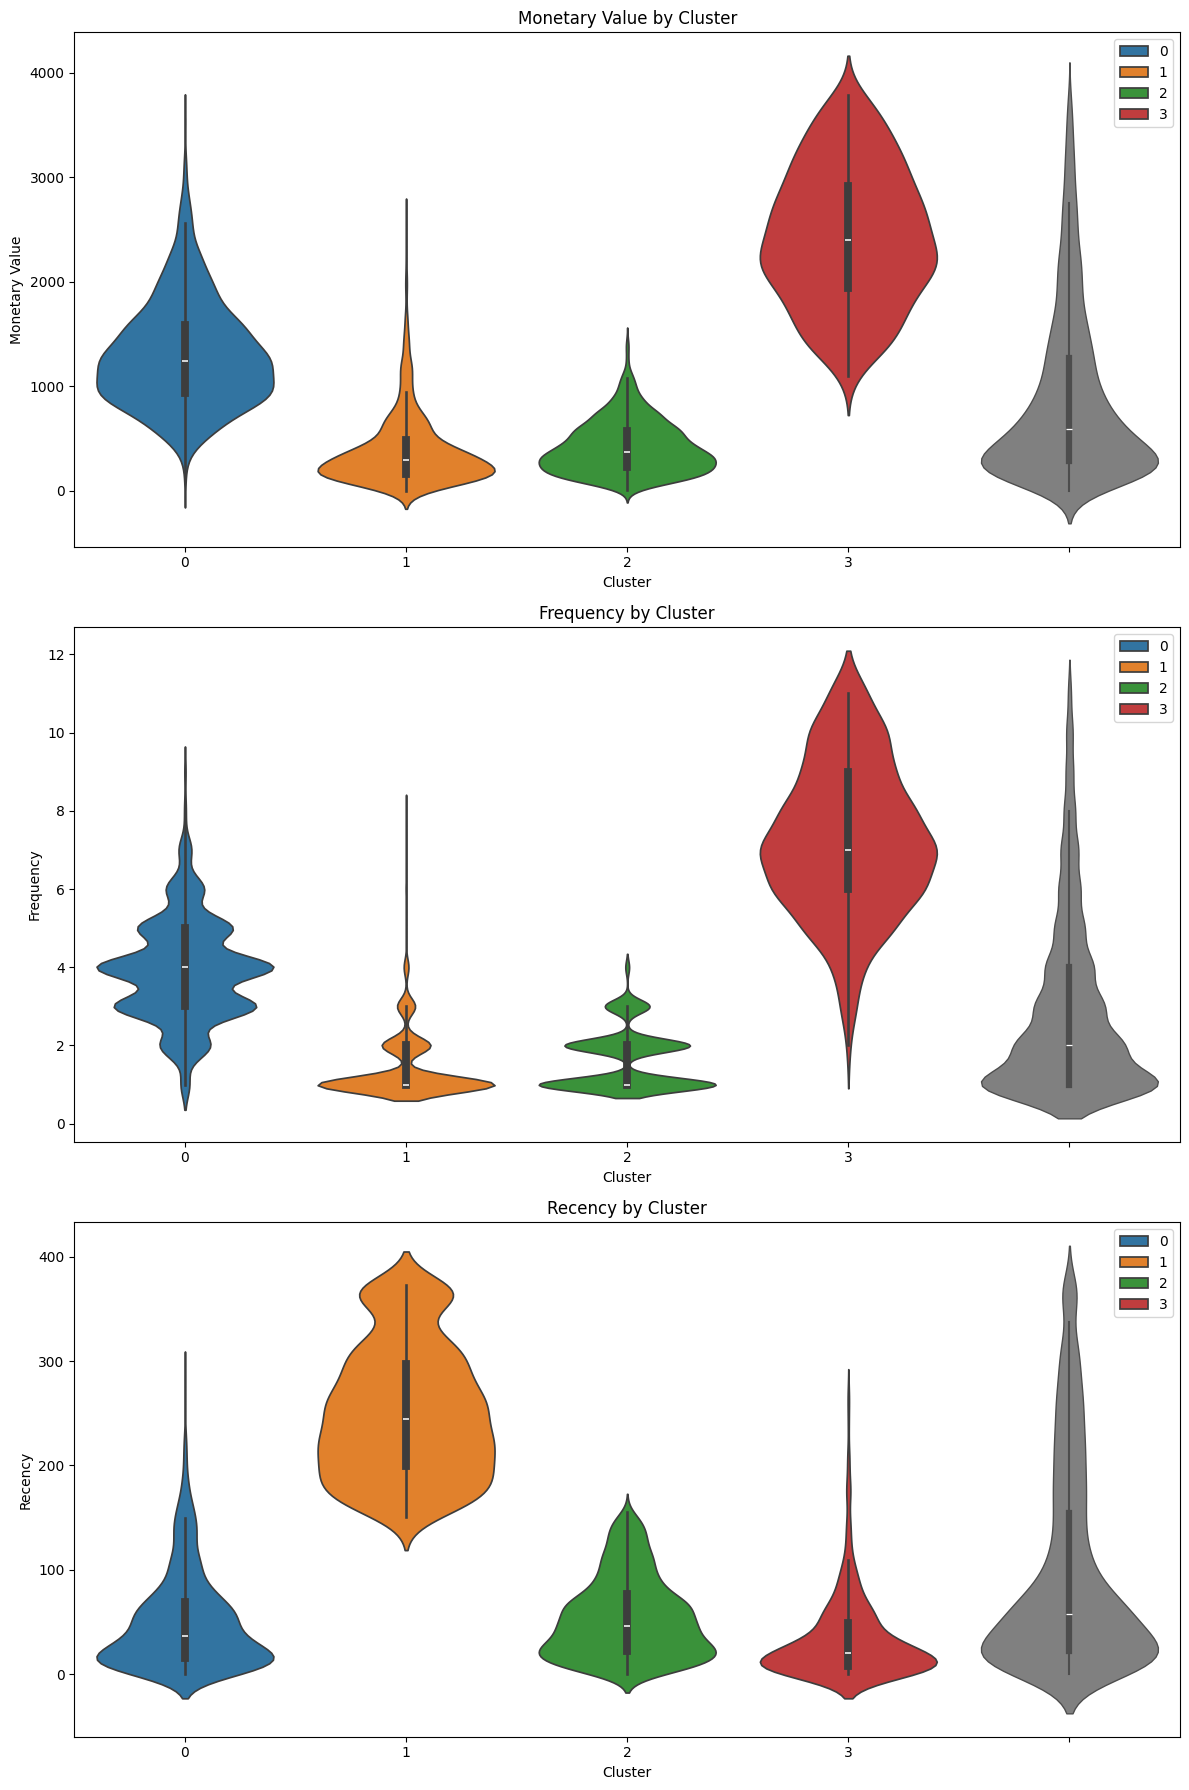

In [72]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

Cluster 0 (Blue): "Retain"
Rationale: This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.
Action: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.

Cluster 1 (Orange): "Re-Engage"
Rationale: This group includes lower-value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.
Action: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.

Cluster 2 (Green): "Nurture"
Rationale: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.
Action: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.

Cluster 3 (Red): "Reward"
Rationale: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.
Action: Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.
Summary of Cluster Names:

Cluster 0 (Blue): "Retain"
Cluster 1 (Orange): "Re-Engage"
Cluster 2 (Green): "Nurture"
Cluster 3 (Red): "Reward"

In [73]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index) 

In [74]:
overlap_indices

Index([  65,   84,   85,   92,  126,  145,  164,  179,  202,  203,
       ...
       4107, 4125, 4143, 4156, 4200, 4235, 4236, 4237, 4241, 4262],
      dtype='int64', length=226)

In [75]:
monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

In [76]:
monetary_only_outliers.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,197.00000,197.00000,197.00000,197,197.00000
mean,14982.24873,6498.45183,7.18782,2010-10-22 15:29:04.568527872,47.91371
min,12357.00000,3802.04000,1.00000,2009-12-10 18:03:00,0.00000
25%,13615.00000,4195.50000,5.00000,2010-10-15 09:33:00,10.00000
50%,14733.00000,5043.40000,7.00000,2010-11-16 09:08:00,23.00000
75%,16636.00000,6790.53000,9.00000,2010-11-29 17:00:00,55.00000
max,18251.00000,52422.30000,11.00000,2010-12-09 15:50:00,364.00000
std,1723.48841,4948.55099,2.67838,NaN,66.34978


In [77]:
frequency_only_outliers.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,53.00000,53.00000,53.00000,53,53.00000
mean,15968.07547,2734.68755,15.03774,2010-11-16 11:47:54.339622656,23.07547
min,12523.00000,1094.39000,12.00000,2010-07-25 13:08:00,0.00000
25%,14825.00000,2347.33000,12.00000,2010-11-10 12:13:00,4.00000
50%,16353.00000,2718.55000,13.00000,2010-11-29 12:42:00,10.00000
75%,17460.00000,3323.75000,16.00000,2010-12-05 12:15:00,29.00000
max,18245.00000,3757.92000,62.00000,2010-12-09 19:28:00,137.00000
std,1707.43816,670.99361,7.01636,NaN,31.93133


In [78]:
monetary_and_frequency_outliers.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,226.00000,226.00000,226.00000,226,226.00000
mean,15208.33186,17147.66383,25.86726,2010-11-25 02:20:29.469026304,14.45133
min,12437.00000,3817.16000,12.00000,2010-05-12 16:51:00,0.00000
25%,13674.50000,5257.35000,14.00000,2010-11-22 12:40:00,2.00000
50%,15227.00000,7802.08000,18.00000,2010-12-02 14:44:30,7.00000
75%,16704.00000,14903.18500,26.00000,2010-12-07 15:35:30,17.00000
max,18260.00000,349164.35000,183.00000,2010-12-09 19:32:00,211.00000
std,1730.08591,34308.16578,23.67728,NaN,24.97358


In [79]:
monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

In [80]:
monetary_only_outliers

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.00000,11229.99000,1,2010-11-16 10:05:00,23,-1
25,12380.00000,4782.84000,4,2010-08-31 14:54:00,100,-1
42,12409.00000,12346.62000,4,2010-10-15 10:24:00,55,-1
48,12415.00000,19468.84000,4,2010-11-29 15:07:00,10,-1
61,12431.00000,4145.52000,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4117,18052.00000,10877.18000,1,2010-05-24 11:11:00,199,-1
4120,18055.00000,4411.38000,6,2010-12-07 09:13:00,2,-1
4147,18092.00000,7111.18000,8,2010-12-09 10:00:00,0,-1
4205,18178.00000,4512.93000,7,2010-11-02 17:24:00,37,-1


In [81]:
frequency_only_outliers

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
115,12523.00000,2330.38000,12,2010-11-30 12:31:00,9,-2
309,12841.00000,3518.33000,17,2010-12-05 12:15:00,4,-2
489,13082.00000,3722.12000,12,2010-10-11 14:19:00,59,-2
519,13117.00000,1658.90000,12,2010-12-09 14:50:00,0,-2
599,13230.00000,3543.31000,17,2010-12-09 19:28:00,0,-2
626,13269.00000,3545.47000,14,2010-12-05 11:51:00,4,-2
777,13491.00000,3350.74000,18,2010-12-02 14:30:00,7,-2
833,13571.00000,2454.22000,14,2010-11-22 13:09:00,17,-2
1116,13963.00000,2347.33000,14,2010-12-07 09:21:00,2,-2
1190,14060.00000,3378.66000,13,2010-12-08 12:40:00,1,-2


In [82]:
monetary_and_frequency_outliers

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
65,12437.00000,6834.99000,20,2010-11-09 14:46:00,30,-3
84,12471.00000,17721.45000,44,2010-11-30 14:35:00,9,-3
85,12472.00000,10426.48000,13,2010-12-05 14:19:00,4,-3
92,12482.00000,21941.72000,27,2010-05-12 16:51:00,211,-3
126,12540.00000,7670.25000,15,2010-11-26 10:43:00,13,-3
...,...,...,...,...,...,...
4235,18223.00000,7516.31000,12,2010-11-17 12:20:00,22,-3
4236,18225.00000,7545.14000,15,2010-12-09 15:46:00,0,-3
4237,18226.00000,6650.83000,15,2010-11-26 15:51:00,13,-3
4241,18231.00000,4791.80000,23,2010-10-29 14:17:00,41,-3


In [83]:
outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers], ignore_index=True)

In [84]:
outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12357.00000,11229.99000,1,2010-11-16 10:05:00,23,-1
1,12380.00000,4782.84000,4,2010-08-31 14:54:00,100,-1
2,12409.00000,12346.62000,4,2010-10-15 10:24:00,55,-1
3,12415.00000,19468.84000,4,2010-11-29 15:07:00,10,-1
4,12431.00000,4145.52000,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
471,18223.00000,7516.31000,12,2010-11-17 12:20:00,22,-3
472,18225.00000,7545.14000,15,2010-12-09 15:46:00,0,-3
473,18226.00000,6650.83000,15,2010-11-26 15:51:00,13,-3
474,18231.00000,4791.80000,23,2010-10-29 14:17:00,41,-3


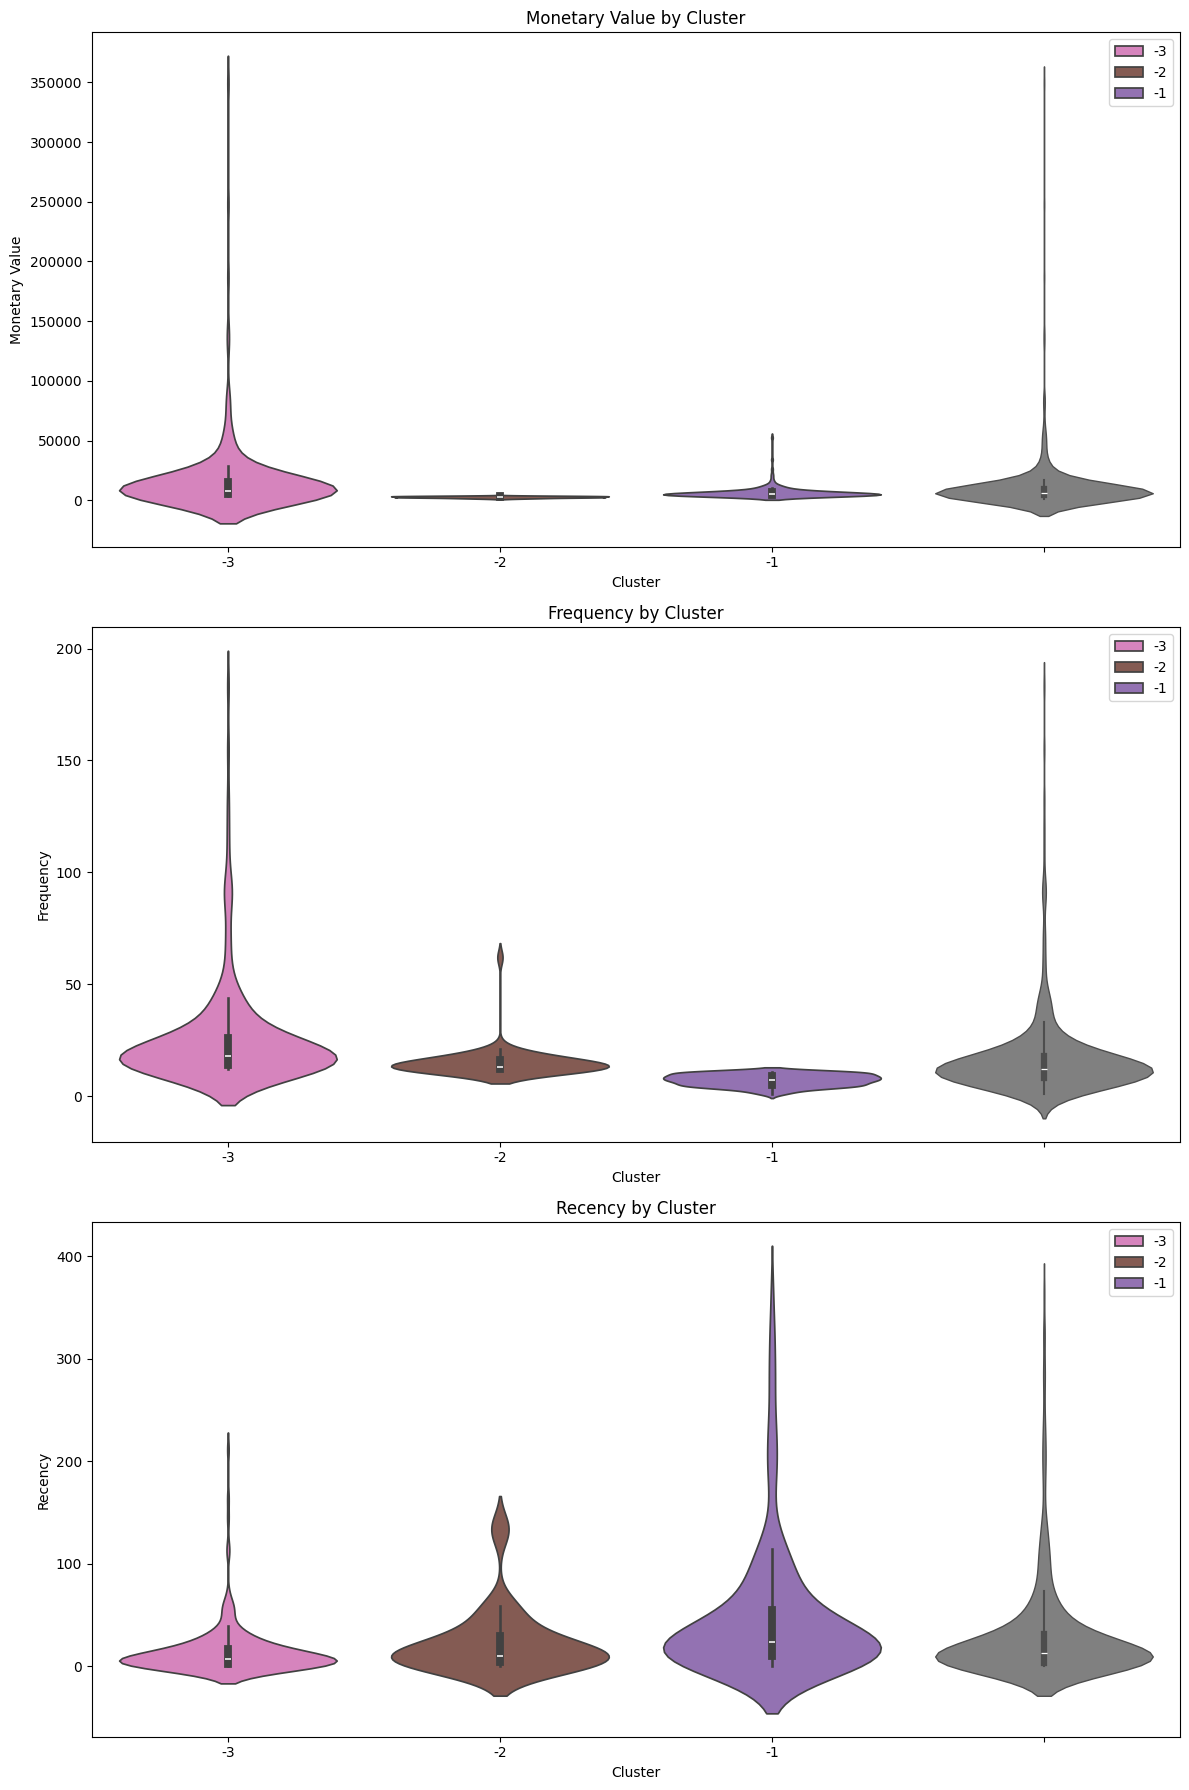

In [85]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

Cluster -1 (Monetary Outliers) PAMPER: Characteristics: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent. Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

Cluster -2 (Frequency Outliers) UPSELL: Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities. Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

Cluster -3 (Monetary & Frequency Outliers) DELIGHT: Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention. Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.

In [86]:
cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [87]:

full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00000,169.36000,2,2010-06-28 13:53:00,164,1
1,12347.00000,1323.32000,2,2010-12-07 14:57:00,2,0
2,12348.00000,221.16000,1,2010-09-27 14:59:00,73,2
3,12349.00000,2221.14000,2,2010-10-28 08:23:00,42,0
4,12351.00000,300.93000,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
471,18223.00000,7516.31000,12,2010-11-17 12:20:00,22,-3
472,18225.00000,7545.14000,15,2010-12-09 15:46:00,0,-3
473,18226.00000,6650.83000,15,2010-11-26 15:51:00,13,-3
474,18231.00000,4791.80000,23,2010-10-29 14:17:00,41,-3


In [88]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.00000,169.36000,2,2010-06-28 13:53:00,164,1,RE-ENGAGE
1,12347.00000,1323.32000,2,2010-12-07 14:57:00,2,0,RETAIN
2,12348.00000,221.16000,1,2010-09-27 14:59:00,73,2,NURTURE
3,12349.00000,2221.14000,2,2010-10-28 08:23:00,42,0,RETAIN
4,12351.00000,300.93000,1,2010-11-29 15:23:00,10,2,NURTURE
...,...,...,...,...,...,...,...
471,18223.00000,7516.31000,12,2010-11-17 12:20:00,22,-3,DELIGHT
472,18225.00000,7545.14000,15,2010-12-09 15:46:00,0,-3,DELIGHT
473,18226.00000,6650.83000,15,2010-11-26 15:51:00,13,-3,DELIGHT
474,18231.00000,4791.80000,23,2010-10-29 14:17:00,41,-3,DELIGHT


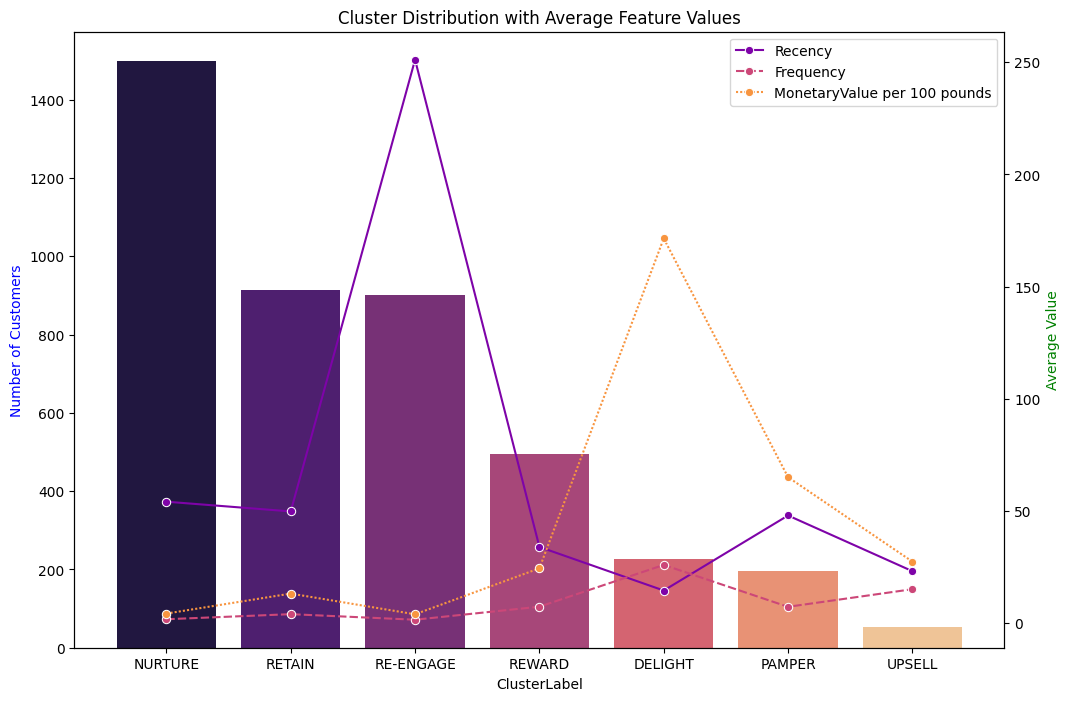

In [89]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='magma', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='plasma', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()